In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
data_path = '/content/drive/MyDrive/disease_prediction_techtern/data'

transform_path = '/content/drive/MyDrive/disease_prediction_techtern/data_transforms'

model_path = '/content/drive/MyDrive/disease_prediction_techtern/models'

output_path = '/content/drive/MyDrive/disease_prediction_techtern/outputs'

visual_path = '/content/drive/MyDrive/disease_prediction_techtern/visuals'


In [74]:
# Reserved for JIT installations

In [75]:
!pip install tensorflow

In [76]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [77]:
# Load dataset from keras - The digit dataset from keras just to run a complete ideas on CNN

In [78]:
dataset = keras.datasets.mnist.load_data()
dataset[:2]

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [79]:
dataset[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [80]:
dataset[0][0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [81]:
len(dataset)  # This indicate that there are 2 datasets - the train and test

2

In [82]:
len(dataset[0][0])

60000

In [83]:
# Extract the train and test dataset

In [84]:
(X_train, y_train),(X_test, y_test) = dataset

In [85]:
len(X_train)

60000

In [86]:
len(y_train)

60000

In [87]:
len(X_test)

10000

In [88]:
len(y_test)

10000

In [89]:
# Treating each datasets

In [90]:
X_train[0]  # This is the pixel representation in arrays for the image at index position 0

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [91]:
X_train[0].shape

(28, 28)

In [92]:
# To check if the pixels or dimension of an image is different

In [93]:
for img in X_train:

  if img.shape != (28,28):
    print(img, 'image shape is different')
  else:
    pass
    #print('The image shape matches.')

In [94]:
for img_test in X_test:
  if img_test.shape != (28,28):
    print('The test image shape is different')
  else:
    pass

In [95]:
# Viewing actual image

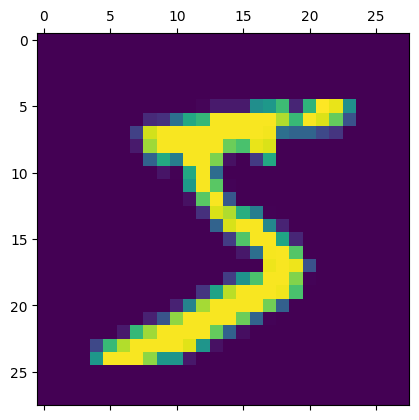

In [96]:
plt.matshow(X_train[0])

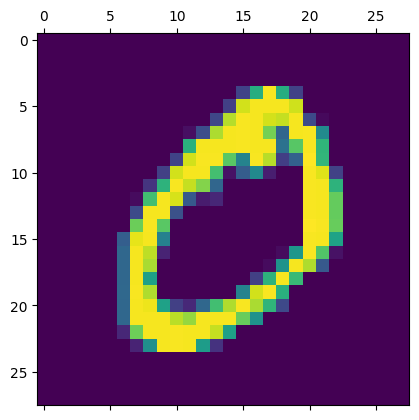

In [97]:
plt.matshow(X_train[1])

In [98]:
y_train[0]

5

In [99]:
y_train[1]

0

In [101]:
# For example
x = [10, 20, 30, 40, 50]
res = []
#counter = 0
for k in x:
  div = k / np.max(x)
  res.append(div)
  #counter += 1

In [102]:
res

[0.2, 0.4, 0.6, 0.8, 1.0]

In [103]:
# We normalize the X_train and X_test

In [104]:
# We divided by 255 because it is the standard highest number of pixels for any image that are not greyscale.
X_train = X_train / 255
X_test = X_test / 255

In [105]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

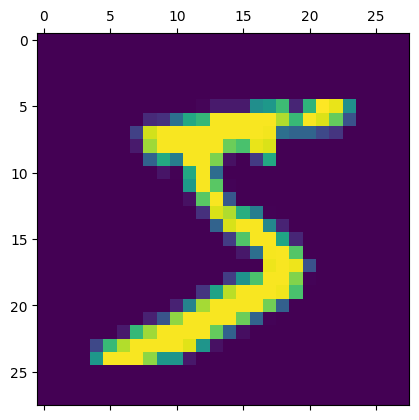

In [106]:
plt.matshow(X_train[0])   # Normalizing doesnt change the originality of the image.

In [107]:
# In normalizing, certain amount of information is lost but are not really affecting my model from learning basic concept in the data.
# The normalized images becomes dimensional and hence it must be flatten. For neural network, the flatten layers are often present hence no need to manually flatten it.

In [108]:
X_train.shape

(60000, 28, 28)

In [109]:
X_test.shape

(10000, 28, 28)

In [110]:
# Manually flatten the dataset

In [111]:
X_train_flatten = X_train.reshape(len(X_train), 28 * 28)
X_test_flatten = X_test.reshape(len(X_test), 28 * 28)

In [112]:
# This flatten the dataset into 1D array of 28 * 28 = 784 pixels points
X_train_flatten.shape

(60000, 784)

In [113]:
X_test_flatten.shape

(10000, 784)

In [114]:
# plt.matshow(X_train_flatten[0]) # You cant plot it again because is now 1D array

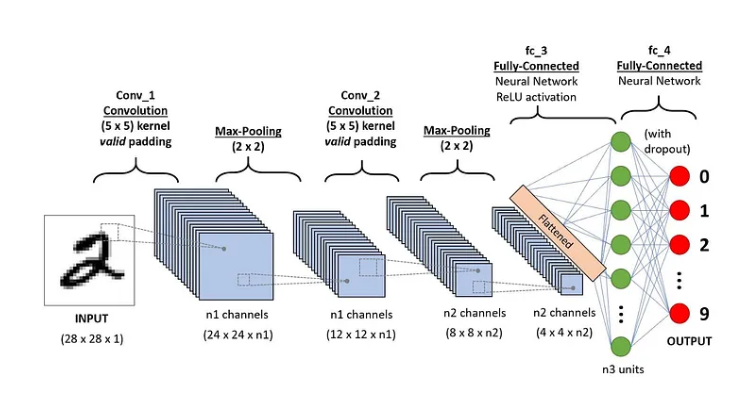

In [115]:
# Defining some convolution parameters

In [116]:
# The way a neural network learn from data is to create a filter which is the kernel. The filter is a feature extraction for any CNN. You can define it as 2 by 2 or 3 by 3 matrices.
# What determines the filter is the complexity of the data or image or sound you are trying to model.
# finer details implies smaller kernel. smaller kernel sizes extract finer images.
# coarse details implies larger kernel. wider or larger kernel sizes extract coarse images. The larger the kernel size the less sensitive the model will be in identifying contours and finer details in your image.
# In reality, the best thing to do is to build multiple models having different kernel sizes which capture different details and this can be use to improve model performance.
# The process of shifting from one pixel to the other is called Convolving hence Convolution.

In [117]:
X_train_flatten.shape

(60000, 784)

In [118]:
# We would need 784 nodes that needs to go into the models to learn from it.
# If learning rate is high, the model learn noise.
# For every convolution we do, we then pool.

##### Model buliding

In [119]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')]) # the 10 is the total output lables expected, here it is digit, hence 0 t0 9 is 10 unique labels.
model

In [120]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4644 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2833 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2733 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2666 - accuracy: 0.9252


In [123]:
# predict the performance on the test data

In [124]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2674 - accuracy: 0.9264


[0.26741012930870056, 0.9264000058174133]

In [125]:
y_pred = model.predict(X_test_flatten)

313/313 [==============================] - 1s 3ms/step


In [126]:
y_pred[0]   # This output are probabilities, hence we pick the highest probabilities and its position from 0 is the predicted number.

array([2.4380954e-02, 2.5581306e-07, 3.8301367e-02, 9.4936478e-01,
       2.5049699e-03, 1.3908859e-01, 2.2876336e-06, 9.9975431e-01,
       8.8654913e-02, 5.9881103e-01], dtype=float32)

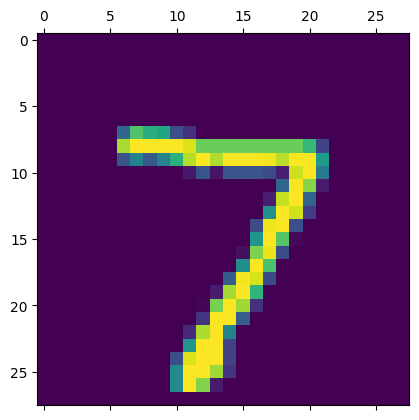

In [127]:
plt.matshow(X_test[0])  # To plot, you use the original X_test before flatten

In [128]:
np.argmax(y_pred[0])  # This is convert to the actual digit predicted using the highest probabilities, thanks to argmax function.

7

In [129]:
y_pred

array([[2.4380954e-02, 2.5581306e-07, 3.8301367e-02, ..., 9.9975431e-01,
        8.8654913e-02, 5.9881103e-01],
       [5.0776386e-01, 6.8594459e-03, 9.9966908e-01, ..., 7.5341101e-13,
        1.7381650e-01, 2.7155747e-09],
       [3.6120386e-04, 9.9369115e-01, 6.2559611e-01, ..., 1.2570192e-01,
        3.3840039e-01, 4.2298246e-02],
       ...,
       [4.6136151e-06, 2.6571547e-06, 1.1196641e-03, ..., 2.1973759e-01,
        5.0205499e-01, 7.6580673e-01],
       [1.2544538e-04, 1.5987840e-04, 1.3438004e-04, ..., 3.7057245e-05,
        5.9039301e-01, 9.4231131e-05],
       [1.5740767e-02, 3.8048759e-10, 2.2752623e-01, ..., 2.8682965e-08,
        2.5642588e-04, 4.1808440e-07]], dtype=float32)

In [130]:
y_pred_labels = [np.argmax(k) for k in y_pred]   # Convert all y_predicted probabilities to actual predicted digit using argmax and list comprehension.
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [131]:
y_test[:5]  # The ground truth. The actual digits

array([7, 2, 1, 0, 4], dtype=uint8)

In [132]:
y_pred_labels[:10] == y_test[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [133]:
# Confusion matrix:
# It gives n X n matrix table where you can see the challenges the model is facing in predicting each unique labels in the data. It is the most useful and powerful tools or metrics in interpreting the robustness of a model.
# For any neural network model built, alays construct the confusion matrix.

In [134]:
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)  # tensorflow has inbuilt confusion_matrix library
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   8,    8,  927,   13,    9,    5,   12,    9,   37,    4],
       [   4,    0,   22,  906,    1,   35,    2,   10,   22,    8],
       [   1,    1,    3,    2,  917,    0,   12,    4,    9,   33],
       [   9,    2,    3,   21,    9,  792,   15,    5,   29,    7],
       [  12,    3,    5,    1,    7,   10,  917,    2,    1,    0],
       [   1,    5,   23,    6,    9,    1,    0,  948,    2,   33],
       [   7,    7,    6,   16,    9,   33,    9,   10,  870,    7],
       [  11,    7,    1,   10,   28,    9,    0,   24,    6,  913]],
      dtype=int32)>

Text(158.22222222222223, 0.5, 'ground truth')

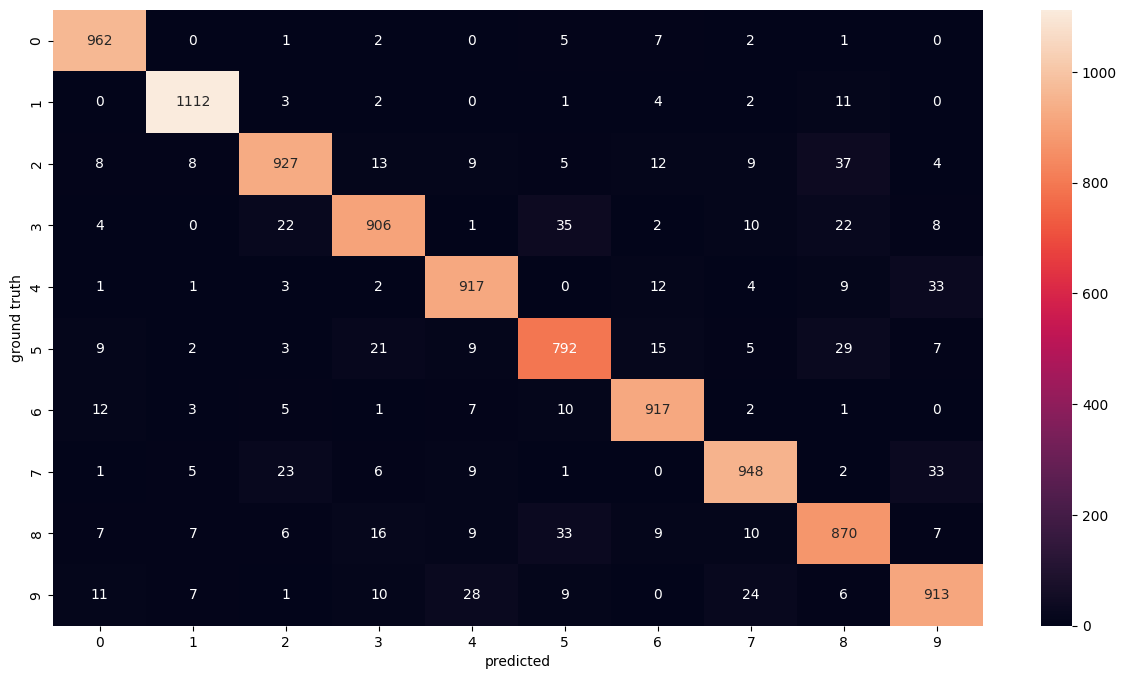

In [135]:
# Displaying the Confusion Matrix
import seaborn as sb

plt.figure(figsize=(15,8 ))

sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('ground truth')

In [136]:
# Interpreting the confusion matrix:
# for the prediction of 0, we can see that, 11 instances of 9 was predicted as 0 and it correctly predicted 962 instances of 0 was rightly predicted.
# The model is struggling and mixing 5 for 8 and 8 for 5. It predicted 33 instances of 8 as 5 and predicted 29 instances of 5 as 8, hence we cannot say the model performance is 92.6% accross board. It is clear that it is not
# 92.6% for both 5 and 8.